# Clustering 
Clustering is a set of techniques used to partition data into groups, or clusters. Clusters are loosely defined as groups of data objects that are more similar to other objects in their cluster than they are to data objects in other clusters. 


Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as k-means clustering, which is implemented in `sklearn.cluster.KMeans`.

We begin with the standard imports:

In [1]:
import matplotlib.pyplot as plt

# K-Means Clustering Algorithm
The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like.

The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
Each point is closer to its own cluster center than to other cluster centers.

## Working
Conventional k-means requires only a few steps. The first step is to randomly select k centroids, where k is equal to the number of clusters you choose. Centroids are data points representing the center of a cluster.

The main element of the algorithm works by a two-step process called expectation-maximization. The expectation step assigns each data point to its nearest centroid. Then, the maximization step computes the mean of all the points for each cluster and sets the new centroid. Here’s what the conventional version of the k-means algorithm looks like:

![](https://files.realpython.com/media/kmeans-algorithm.a94498a7ecd2.png)

### Imports for implementing K-Means Clustering


In [2]:
!pip install kneed

In [3]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize

First, let's generate a two-dimensional dataset containing four distinct blobs. 

make_blobs() is a convenience function in scikit-learn used to generate synthetic clusters. It uses these parameters:

* n_samples is the total number of samples to generate.
* centers is the number of centers to generate.
* cluster_std is the standard deviation.

Nondeterministic machine learning algorithms like k-means are difficult to reproduce. The random_state parameter is set to an integer value so you can follow the data presented in the tutorial.

make_blobs() returns a tuple of two values:

* A two-dimensional NumPy array with the x- and y-values for each of the samples
* A one-dimensional NumPy array containing the cluster labels for each sample

In [4]:
features, true_labels = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=0.60,
    random_state=0
)

Here’s a look at the first five elements for each of the variables returned by make_blobs():

In [5]:
features[:5]

array([[ 0.83685684,  2.13635938],
       [-1.4136581 ,  7.40962324],
       [ 1.15521298,  5.09961887],
       [-1.01861632,  7.81491465],
       [ 1.27135141,  1.89254207]])

In [6]:
true_labels[:5]

array([1, 3, 0, 3, 1])

The dataset is actually labeled and true_labels represents the labels of each data point. However, to emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization.

Let's visualize the data using a scatter plot

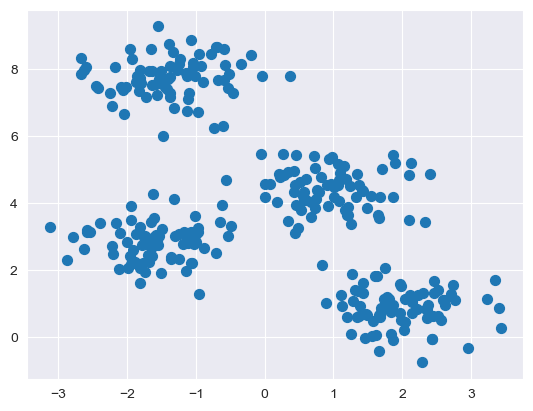

In [7]:
plt.scatter(features[:, 0], features[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. 

## Feature Scaling
Data sets usually contain numerical features that have been measured in different units, such as height (in inches) and weight (in pounds). A machine learning algorithm would consider weight more important than height only because the values for weight are larger and have higher variability from person to person.

Machine learning algorithms need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.

The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.

There are several approaches to implementing feature scaling. In this example, we’ll use the StandardScaler class. This class implements a type of feature scaling called standardization. Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1:

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(features)
X[:5]

array([[ 0.51625508, -0.70722723],
       [-0.86166376,  1.3290677 ],
       [ 0.71117444,  0.43704896],
       [-0.61979222,  1.48557283],
       [ 0.78228231, -0.8013784 ]])

## Building a K-Means Model
Now the data is ready to be clustered. The KMeans estimator class in scikit-learn is where you set the algorithm parameters before fitting the estimator to the data. The scikit-learn implementation is flexible, providing several parameters that can be tuned.

Here are the parameters used in this example:

* **init** controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". Setting this to "k-means++" employs an advanced trick to speed up convergence, which you’ll use later.

* **n_clusters** sets k for the clustering step. This is the **most important parameter for k-means**.

* **n_init** sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

* **max_iter** sets the number of maximum iterations for each initialization of the k-means algorithm.

Instantiate the KMeans class with the following arguments:

In [9]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=0
)

## Training the model
Now that the k-means class is ready, the next step is to fit it to the data in scaled_features. This will perform ten runs of the k-means algorithm on your data with a maximum of 300 iterations per run:

In [10]:
kmeans.fit(X)

C:\Users\edwin\anaconda3\envs\financevenv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=4, n_init=10, random_state=0)

## Assessing the attributes from training
Statistics from the initialization run with the lowest SSE are available as attributes of kmeans after calling .fit():

In [11]:
# The lowest SSE value
kmeans.inertia_

56.02477057509951

In [12]:
# Final locations of the centroids
kmeans.cluster_centers_

array([[-0.83691948,  1.46193015],
       [ 0.58536699,  0.17425154],
       [ 1.21774671, -1.19712077],
       [-0.96619422, -0.43906093]])

In [13]:
# The number of iterations required to converge
kmeans.n_iter_

6

Finally, the cluster assignments are stored as a one-dimensional NumPy array in kmeans.labels_. Here’s a look at the first five predicted labels:

In [14]:
kmeans.labels_[:5]

array([2, 0, 1, 0, 2])

**Note:** Ordering of cluster labels is dependent on the initialization. So it's normal to see that clusters with true_labels as 3 labeled with 2 here. This doesn’t affect clustering evaluation metrics.

Rather than using labels_, you can also get the predicted the labels using the `predict` method.

In [15]:
y_kmeans = kmeans.predict(X)
y_kmeans[:5]

array([2, 0, 1, 0, 2])

## Visualizing results
Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

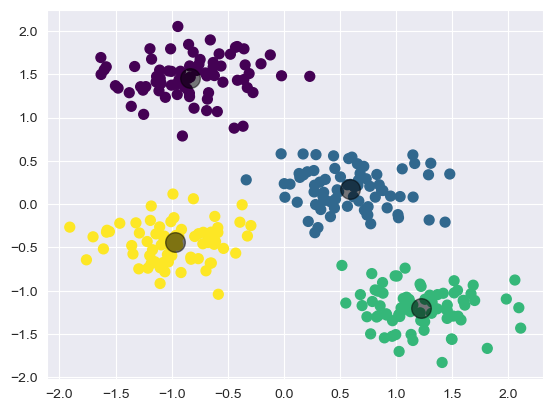

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

The good news is that the k-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye. 

# Conclusion
In this notebook, we implemented K-Means algorithm to identify the clusters in a simple dataset. 

# References


*   https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb#scrollTo=VGwRIScwNnlb
*   https://realpython.com/k-means-clustering-python/#how-to-perform-k-means-clustering-in-python

